## Лабораторная работа №2 по курсу "Методы оптимизации"


**Выполнила:** Артюшина Анастасия

**Группа:** РК6-61Б

Модель Лотки-Вольтерры, описывая взаимодействие двух видов типа "хищник-жертва", показывает, что численность рассматриваемых популяций в течение времени изменяется по гармоническому закону. При этом существует некоторая стационарная точка, вокруг которой происходят колебания системы.

В живой природе подобные системы находятся в некотором устойчивом состоянии, нарушение которого может привести к вымиранию видов. Такие ситуации представляют наибольший интерес, и этим обусловлен выбор рассматриваемого критерия устойчивости.

**Предположим, что на грани вымирания видов отношение численности жертв к численности хищников должно быть равно 1,5.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve, minimize
import math


class Biome(object):

    def __init__(self, pred_init=1, prey_init=1, tmax=10, dt=0.001):
        self._dt = dt
        self._n_iters = int(tmax / dt)
        # Intial state
        self.pred_init = pred_init
        self.prey_init = prey_init
        # Data arrays
        self.time = None
        self.prey = None
        self.pred = None

    def run(self, alpha, beta, delta, gamma):
        """
        Simulation settings:
            alpha - prey growth
            beta - prey mortality
            delta - predator growrh
            gamma - predator mortality
        """
        self.time = np.zeros(self._n_iters)
        self.prey = np.zeros(self._n_iters)
        self.pred = np.zeros(self._n_iters)
        self.prey[0] = self.prey_init
        self.pred[0] = self.pred_init
        # Lotka-Volterra equations
        for i in range(self._n_iters - 1):
            self.prey[i + 1] = self.prey[i] + self._dt * self.prey[i] * (alpha - self.pred[i] * beta)
            self.pred[i + 1] = self.pred[i] + self._dt * self.pred[i] * (delta * self.prey[i] - gamma)
        self.time[1:] = np.add.accumulate([self._dt] * (self._n_iters - 1))
        return self.time, self.prey, self.pred

    def plot(self):
        plt.xlabel('time')
        plt.ylabel('n')
        plt.plot(self.time, self.pred, label='predators', color='deeppink')
        plt.plot(self.time, self.prey, label='preys', color='deepskyblue')
        plt.legend()
        plt.grid()
        plt.show()

    def plot_cycle(self):
        plt.xlabel('n predators')
        plt.ylabel('n preys')
        plt.plot(self.pred, self.prey, color='orange')
        plt.grid()
        plt.show()



In [2]:
def solve(numbers):
    alpha, beta, gamma, delta = numbers 
    x_0 = 1
    y_0 = 1
    # стационарная позиция системы: 
    x_const = gamma / delta
    y_const = alpha / beta
    
    # выражаем значение константы из математической модели Лотки-Вольтерры:
    c = beta * y_0 + delta * x_0 - alpha * np.log(np.abs(y_0)) - gamma * np.log(np.abs(x_0))
    
    def count_x(x):
        return beta * y_const + delta * x - alpha * np.log(np.abs(y_const)) - gamma * np.log(np.abs(x)) - c
    def count_y(y):
        return beta * y + delta * x_const - alpha * np.log(np.abs(y)) - gamma * np.log(np.abs(x_const)) - c

    # минимальая популяция жертв и хищников (пик вымирания):
    x_min = fsolve(count_x, 0.001)
    y_min = fsolve(count_y, 0.001)
    
    return np.abs(y_min / x_min - 1.5)

Рассчитанные параметры системы:
alpha = 0.9131887141439458
beta  = 0.7539641974789816
gamma = 1.0589127527419102
delta = 1.3459351605072885


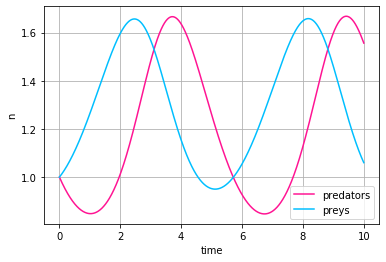

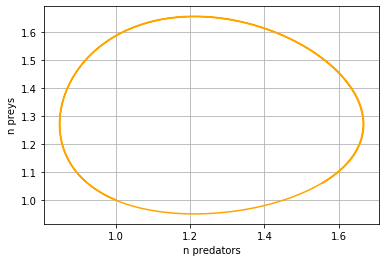

In [3]:
def main():
    parametrs = minimize(solve, [1,1,1,1])
    alpha, beta, gamma, delta = parametrs.x
    print ("Рассчитанные параметры системы:")
    print("alpha = {}".format(alpha))
    print("beta  = {}".format(beta))
    print("gamma = {}".format(gamma))
    print("delta = {}".format(delta))
    biome = Biome(pred_init=1, prey_init=1, tmax = 10, dt = 0.001)
    biome.run(alpha, beta, gamma, delta)
    biome.plot()
    biome.plot_cycle()

if __name__ == "__main__":
    main()